This notebook creates all the figures in the manuscript.
In order to run it, it will be necessary to already have run the script 'simulations.py' for all the parameter sets and have their csv products in the same folder

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from rev_lib import *

Initiate parameters

In [2]:
def get_confidence(y):
    y = np.array(y)
    yt = y.transpose()
    
    mean= np.mean(y,axis=0) 
    under95 = [np.percentile(d,2.5) for d in yt]
    under50 = [np.percentile(d,25) for d in yt]
    median  = [np.percentile(d,50) for d in yt]
    upper50 = [np.percentile(d,75) for d in yt]
    upper95 = [np.percentile(d,97.5) for d in yt]
    return mean,under95,under50,median,upper50,upper95
    

def plot_confidence(ax,mean,under95,under50,median,upper50,upper95,label=True,color='b'):
    x = np.arange(mean.size)
    if label:
        ax.plot(mean,color='r',label='Mean')
        ax.plot(median,color='k',label='Median')
        ax.fill_between(x,under95,under50,color=color,alpha=.25, label = '95% Credible interval')
        ax.fill_between(x,under50,upper50,color=color,alpha=.5,label = '50% Credible interval')
        ax.fill_between(x,upper50,upper95,color=color,alpha=.25)
    else:
        ax.plot(mean,color='r')
        ax.plot(median,color='k')
        ax.fill_between(x,under95,under50,color=color,alpha=.25)
        ax.fill_between(x,under50,upper50,color=color,alpha=.5)
        ax.fill_between(x,upper50,upper95,color=color,alpha=.25)

**Cynical model -- main text**

In [3]:
gl = params(10,5,3,'c')

Marginalized

In [4]:
rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))

In [5]:
x = np.array(1-rho_cf)
xt = x.transpose()
median_f  = np.array([np.percentile(d,50) for d in xt])
upper95_f = np.array([np.percentile(d,97.5) for d in xt])    

y = np.array(rho_cr)
yt = y.transpose()
median_r  = np.array([np.percentile(d,50) for d in yt])
upper95_r = np.array([np.percentile(d,97.5) for d in yt])

cf05= (median_f<.05).argmax()
cr05= (median_r<.05).argmax()
cf50= (upper95_f<.5).argmax()
cr50= (upper95_r<.5).argmax()

cf05,cr05,cf50,cr50

(81, 78, 102, 94)

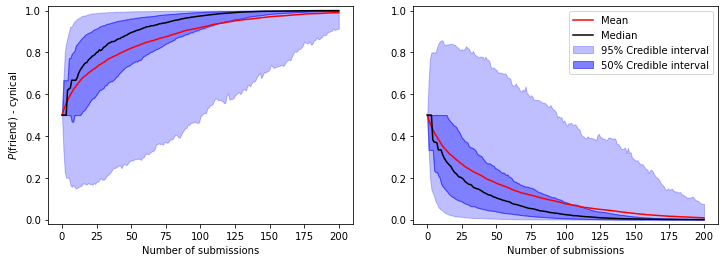

In [6]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

plot_confidence(ax[0],*get_confidence(rho_cf))
ax[0].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[0].set_xlabel('Number of submissions')
ax[0].set_ylim([-.02,1.02])
#ax[0].plot([0,cf05,cf05],[.95,.95,0],color='orange')
#ax[0].plot([0,cf50,cf50],[.5,.5,0],color='cyan')


plot_confidence(ax[1],*get_confidence(rho_cr))
#ax[1].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[1].set_xlabel('Number of submissions')
ax[1].set_ylim([-.02,1.02])
#ax[1].plot([0,cr05,cr05],[.05,.05,0],color='orange')
#ax[1].plot([0,cr50,cr50],[.5,.5,0],color='cyan')

plt.legend()
plt.savefig('rho_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('rho_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

MAP

In [7]:
mp = pd.read_csv('map_{}.csv'.format(gl.suffix))

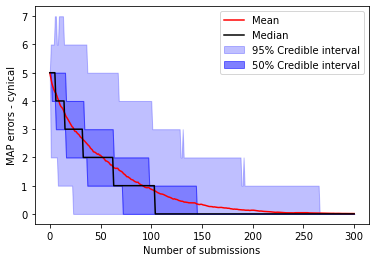

In [8]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(mp))

ax.set_ylabel('MAP errors - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('map_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('map_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

Entropy

In [9]:
S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))

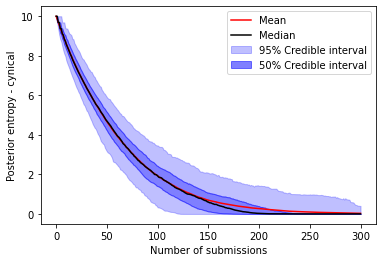

In [10]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(S))

ax.set_ylabel(r'Posterior entropy - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('entropy_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('entropy_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

Third conf

In [11]:
prob3 = pd.read_csv('prob3_{}.csv'.format(gl.suffix))
prob3 = prob3.to_numpy()

In [12]:
x = np.array(prob3)
xt = x.transpose()
median_3  = np.array([np.percentile(d,50) for d in xt])

c50 = (median_3>.95).argmax()
c50

78

In [13]:
dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()

In [14]:
np.median(p3nums),np.mean(p3nums)

(72.0, 73.14585414585414)

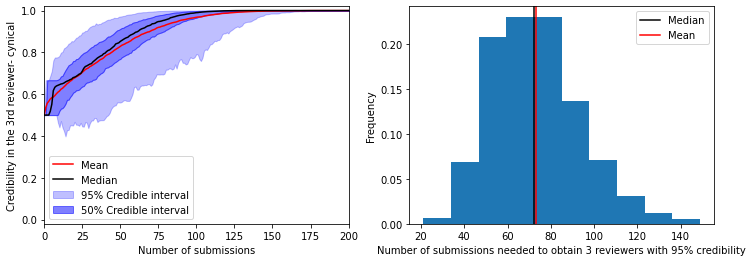

In [15]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

plot_confidence(ax[0],*get_confidence(prob3))
#ax[0].plot([0,c50,c50],[.95,.95,0],color='orange')
ax[0].set_ylim([-.02,1.02])
ax[0].set_xlim([0,200])

ax[0].set_ylabel(r'Credibility in the 3rd reviewer- {}'.format(gl.model_name))
ax[0].set_xlabel('Number of submissions')
ax[0].legend()

ax[1].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[1].axvline(np.median(p3nums),color='k',label='Median')
ax[1].axvline(np.mean(p3nums),color='r',label='Mean')
ax[1].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[1].set_ylabel('Frequency')
ax[1].legend()


#plt.legend()
plt.savefig('prob3_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('prob3_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

**Quality model -- main text**

In [16]:
gl = params(10,5,3,'q')

Marginalized

In [17]:
rho_cf = pd.read_csv('rho_friend_{}.csv'.format(gl.suffix))
rho_cr = pd.read_csv('rho_rival_{}.csv'.format(gl.suffix))

In [18]:
x = np.array(1-rho_cf)
xt = x.transpose()
median_f  = np.array([np.percentile(d,50) for d in xt])
upper95_f = np.array([np.percentile(d,97.5) for d in xt])    

y = np.array(rho_cr)
yt = y.transpose()
median_r  = np.array([np.percentile(d,50) for d in yt])
upper95_r = np.array([np.percentile(d,97.5) for d in yt])

cf05= (median_f<.05).argmax()
cr05= (median_r<.05).argmax()
cf50= (upper95_f<.5).argmax()
cr50= (upper95_r<.5).argmax()

cf05,cr05,cf50,cr50

(430, 446, 637, 576)

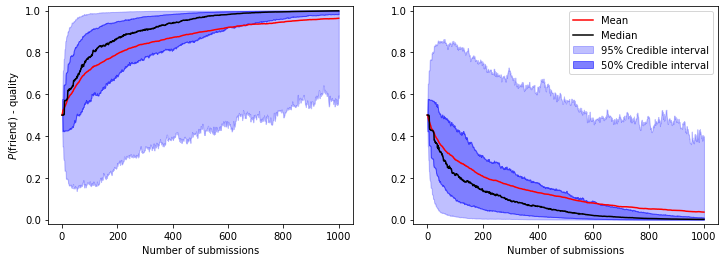

In [19]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

plot_confidence(ax[0],*get_confidence(rho_cf))
ax[0].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[0].set_xlabel('Number of submissions')
ax[0].set_ylim([-.02,1.02])
#ax[0].plot([0,cf05,cf05],[.95,.95,0],color='orange')
#ax[0].plot([0,cf50,cf50],[.5,.5,0],color='cyan')


plot_confidence(ax[1],*get_confidence(rho_cr))
#ax[1].set_ylabel(r'$P($friend$)$ - {}'.format(gl.model_name))
ax[1].set_xlabel('Number of submissions')
ax[1].set_ylim([-.02,1.02])
#ax[1].plot([0,cr05,cr05],[.05,.05,0],color='orange')
#ax[1].plot([0,cr50,cr50],[.5,.5,0],color='cyan')

plt.legend()
plt.savefig('rho_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('rho_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

MAP

In [20]:
mp = pd.read_csv('map_{}.csv'.format(gl.suffix))

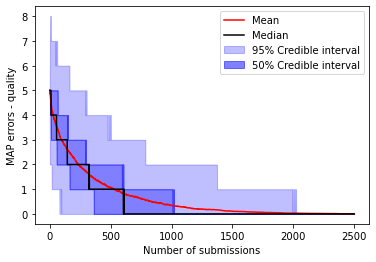

In [21]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(mp))

ax.set_ylabel('MAP errors - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('map_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('map_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

Entropy

In [22]:
S = pd.read_csv('entropy_{}.csv'.format(gl.suffix))

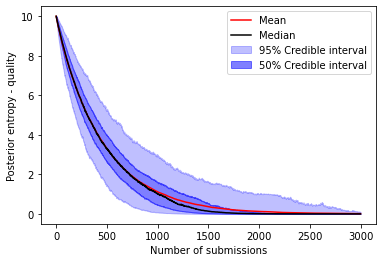

In [23]:
fig,ax=plt.subplots(1)

plot_confidence(ax,*get_confidence(S))

ax.set_ylabel(r'Posterior entropy - {}'.format(gl.model_name))
ax.set_xlabel('Number of submissions')
plt.legend()
plt.savefig('entropy_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('entropy_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()

Third conf

In [24]:
prob3 = pd.read_csv('prob3_{}.csv'.format(gl.suffix))
prob3 = prob3.to_numpy()

In [25]:
x = np.array(prob3)
xt = x.transpose()
median_3  = np.array([np.percentile(d,50) for d in xt])
low_3 = np.array([np.percentile(d,2.5) for d in xt])    


c50,c05 = (median_3>.95).argmax(),(low_3>.5).argmax()
#(median_r>.05).argmax(),(upper95_r<.5).argmax()

In [26]:
x = np.array(prob3)
xt = x.transpose()
median_3  = np.array([np.percentile(d,50) for d in xt])

c95 = (median_3>.95).argmax()
c95

452

In [27]:
dferr = pd.read_csv('prob3_errors_{}.csv'.format(gl.suffix))
p3nums = dferr['number'].to_numpy()

In [28]:
np.median(p3nums),np.mean(p3nums)

(383.0, 411.5014985014985)

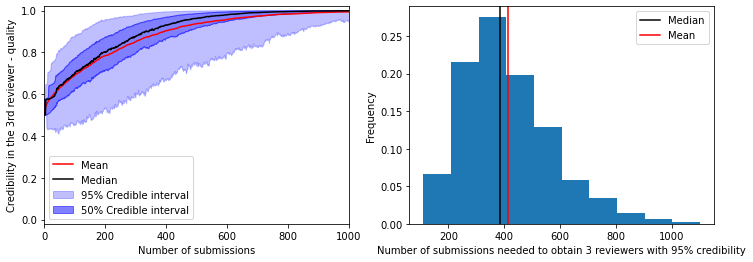

In [29]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

plot_confidence(ax[0],*get_confidence(prob3))
#ax[0].plot([0,c95,c95],[.95,.95,0],color='orange')
ax[0].set_ylim([-.02,1.02])
ax[0].set_xlim([0,1000])

ax[0].set_ylabel(r'Credibility in the 3rd reviewer - {}'.format(gl.model_name))
ax[0].set_xlabel('Number of submissions')
ax[0].legend()

ax[1].hist(p3nums,weights=np.ones_like(p3nums)/p3nums.size)
ax[1].axvline(np.median(p3nums),color='k',label='Median')
ax[1].axvline(np.mean(p3nums),color='r',label='Mean')
ax[1].set_xlabel('Number of submissions needed to obtain 3 reviewers with 95% credibility')
ax[1].set_ylabel('Frequency')
ax[1].legend()


plt.legend()
plt.savefig('prob3_{}.png'.format(gl.suffix),dpi=600,bbox_inches="tight")
plt.savefig('prob3_{}.pdf'.format(gl.suffix),dpi=600,bbox_inches="tight",format="pdf")
plt.show()